In [43]:
import json
import matplotlib
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from cycler import cycler
cm = plt.cm.tab10.colors
cycle = (cycler(color=cm) * cycler(linestyle=['-', '--', '-.']))
# for d in cycle:
#     print(d)
plt.rcParams['figure.figsize'] = [16, 16]
matplotlib.rcParams['figure.dpi'] = 300

In [84]:
from jsonmerge import merge
import json

def mergeJSON(json_1_file_loc, json_2_file_loc, result_file_loc):
    with open(json_1_file_loc) as json_file:
        json1 = json.load(json_file)
#         for p in json1['sel=tour2']:
#             print(p)

    with open(json_2_file_loc) as json_file:
        json2 = json.load(json_file)
#         for p in json2['sel=tour2']:
#             print(p)
            
    result = merge(json1, json2)

    with open(result_file_loc, 'w') as outfile:
        json.dump(result, outfile)

def combineMultiple(prepend, append, begin, end, outappend):
#     jsonBase
    filename = prepend + str(begin) + append
    with open(filename) as json_file:
        print ("base json", filename)
        jsonBase = json.load(json_file)
    
    for i in range(begin+1,end+1):
        filename = prepend + str(i) + append
        print ("adding", filename, "to the json")
        with open(filename) as json_file:
            jsonAdd = json.load(json_file)
            jsonBase = merge(jsonBase, jsonAdd)
    
    with open(prepend + outappend, 'w') as outfile:
        json.dump(jsonBase, outfile)

In [79]:
mergeJSON('../data/exp6/combine2/lkadsjflkadjsf.json',
          '../data/exp6/combine2/data_combined.json', 
          '../data/exp6/combine2/data_combined.json')

FileNotFoundError: [Errno 2] No such file or directory: '../data/exp6/combine2/lkadsjflkadjsf.json'

In [100]:
combineMultiple("../data/exp6/data_scaling_0123/data", ".json", 2, 7, "_combined.json")

base json ../data/exp6/data_scaling_0123/data2.json
adding ../data/exp6/data_scaling_0123/data3.json to the json
adding ../data/exp6/data_scaling_0123/data4.json to the json
adding ../data/exp6/data_scaling_0123/data5.json to the json
adding ../data/exp6/data_scaling_0123/data6.json to the json
adding ../data/exp6/data_scaling_0123/data7.json to the json


# Experiment 6.1: All algorithms on NASBenchV2 (Convergence plots)

In [21]:
i = 0
maxX = 7
accuracies = np.zeros((10,maxX))
values = [0, 1, 3, 4]
print(len(values))
fillUntil = min(len(values), maxX)
accuracies[i, 0:fillUntil] = values[0:fillUntil]
if(fillUntil < maxX):
    accuracies[i, fillUntil:maxX] = accuracies[i, fillUntil-1]
print(accuracies)


4
[[0. 1. 3. 4. 4. 4. 4.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


averages of 100 repetitions
averages of 100 repetitions


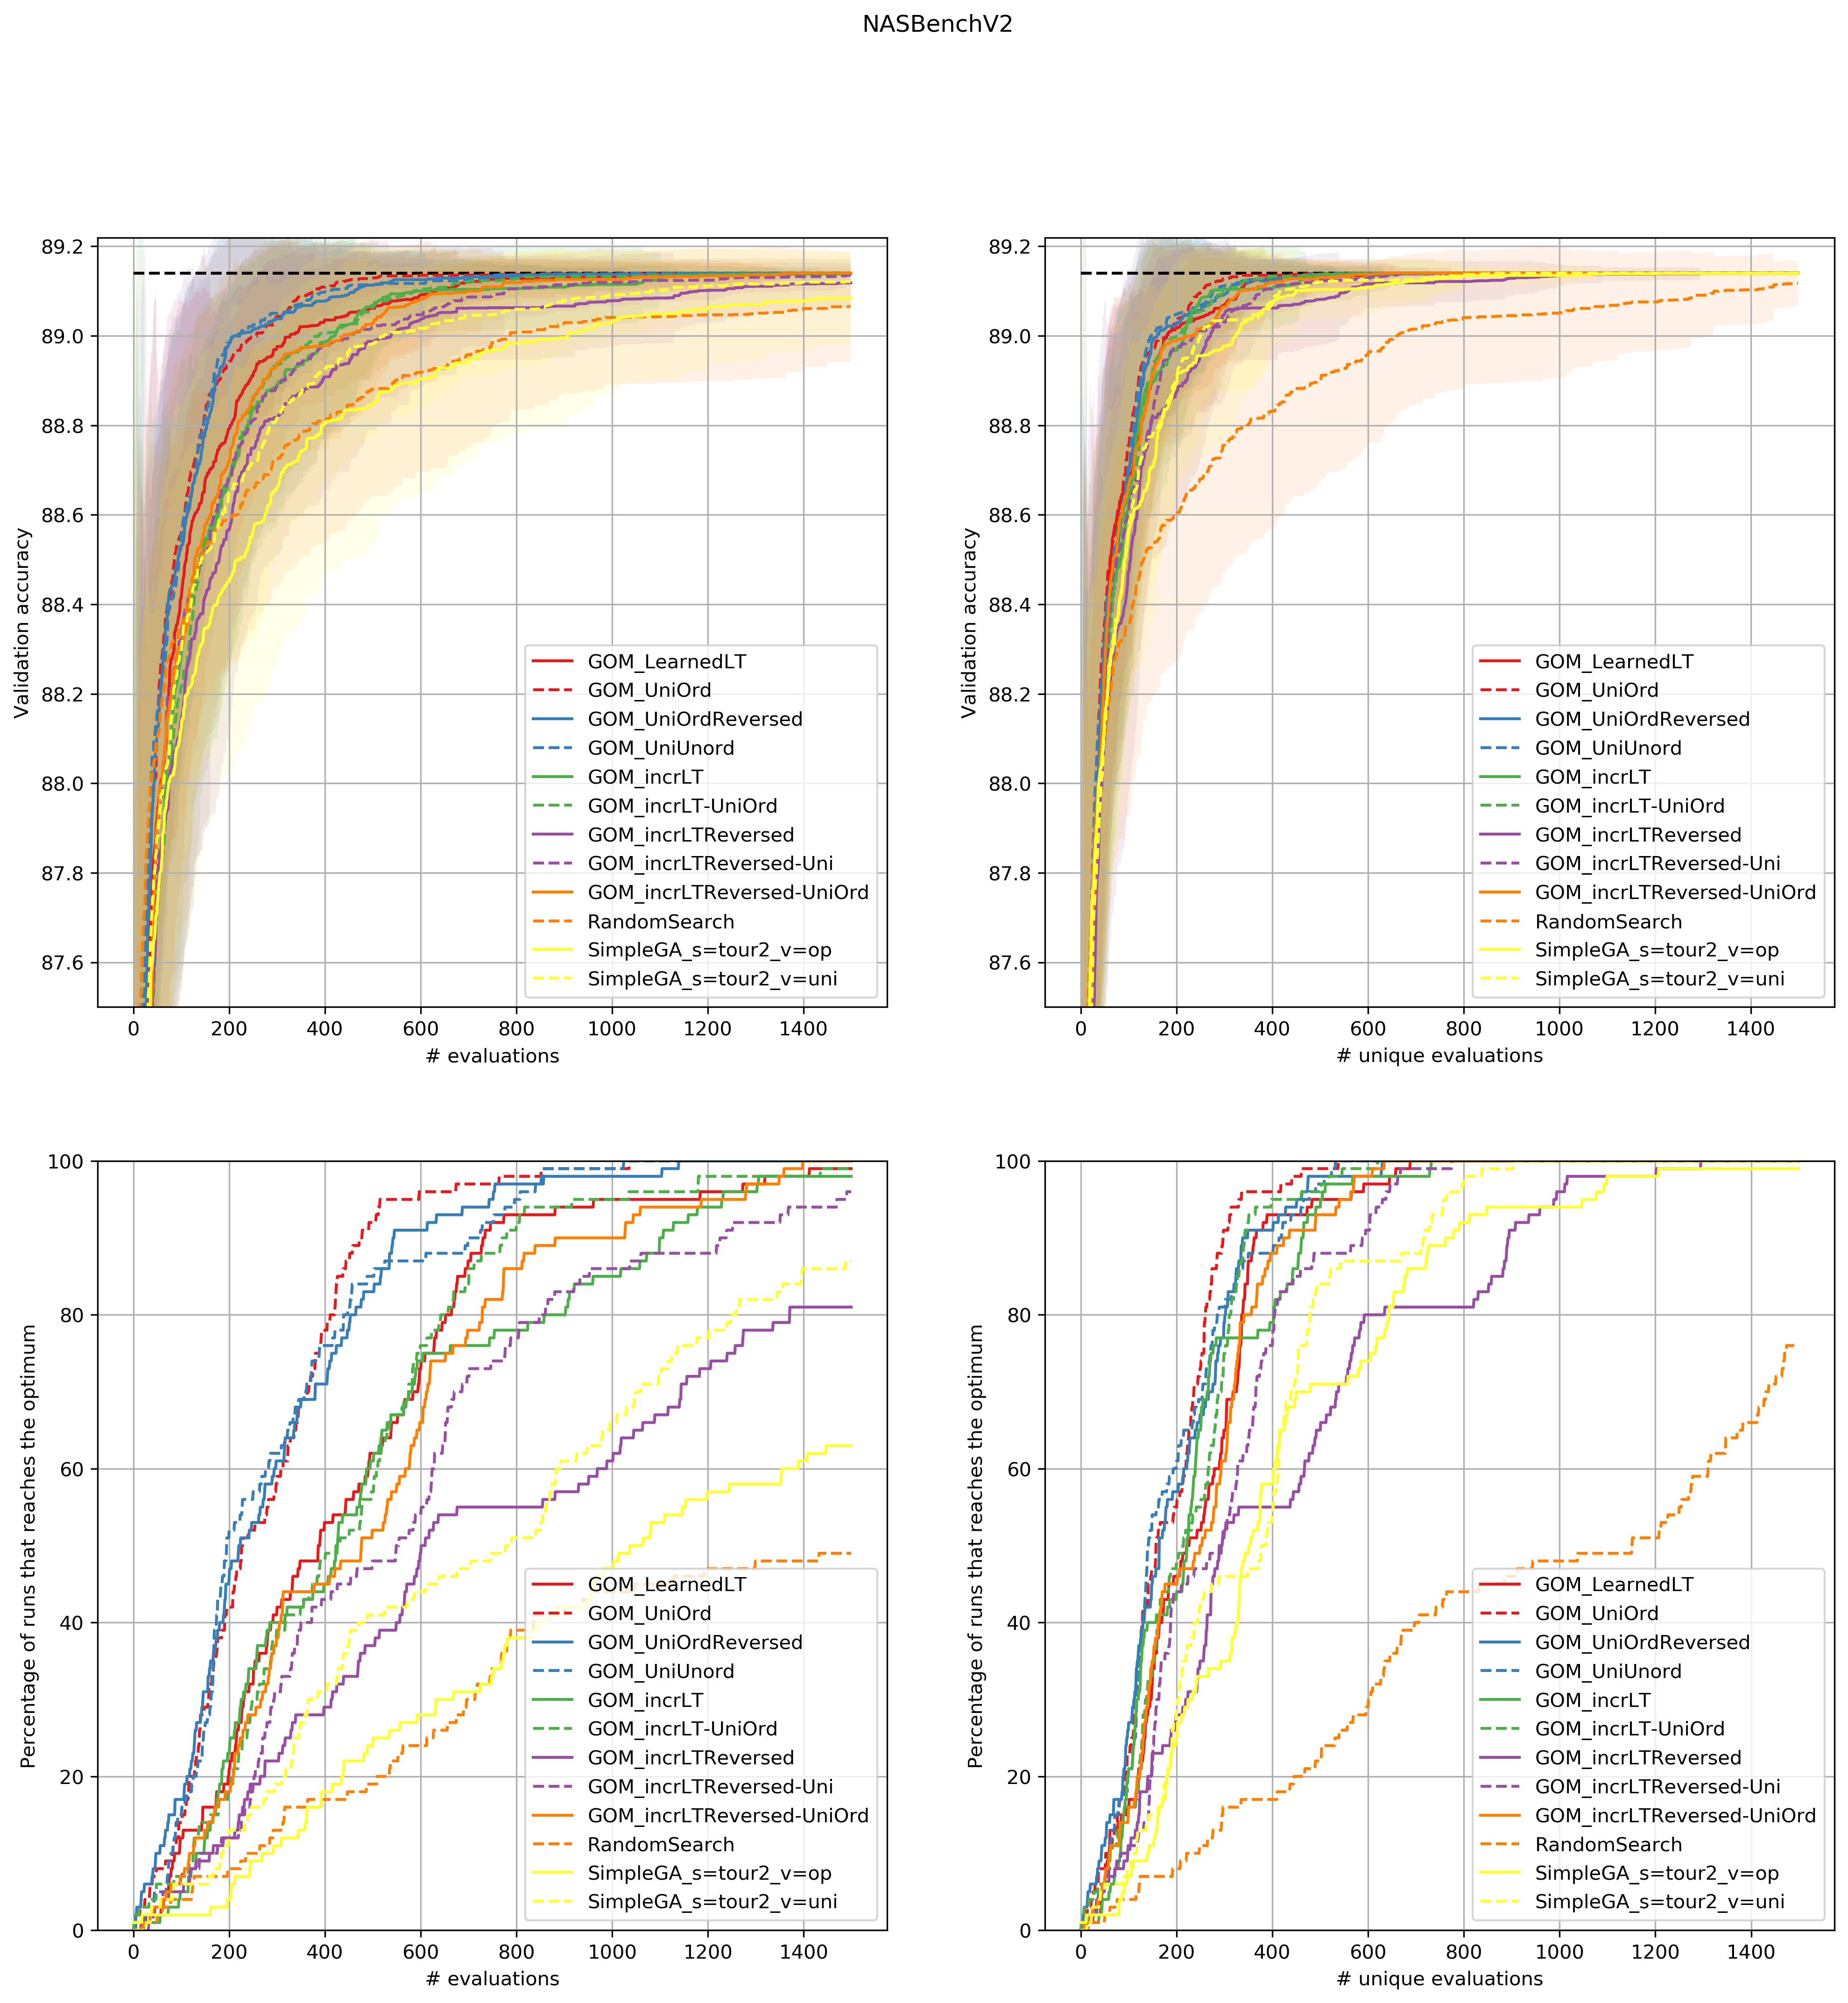

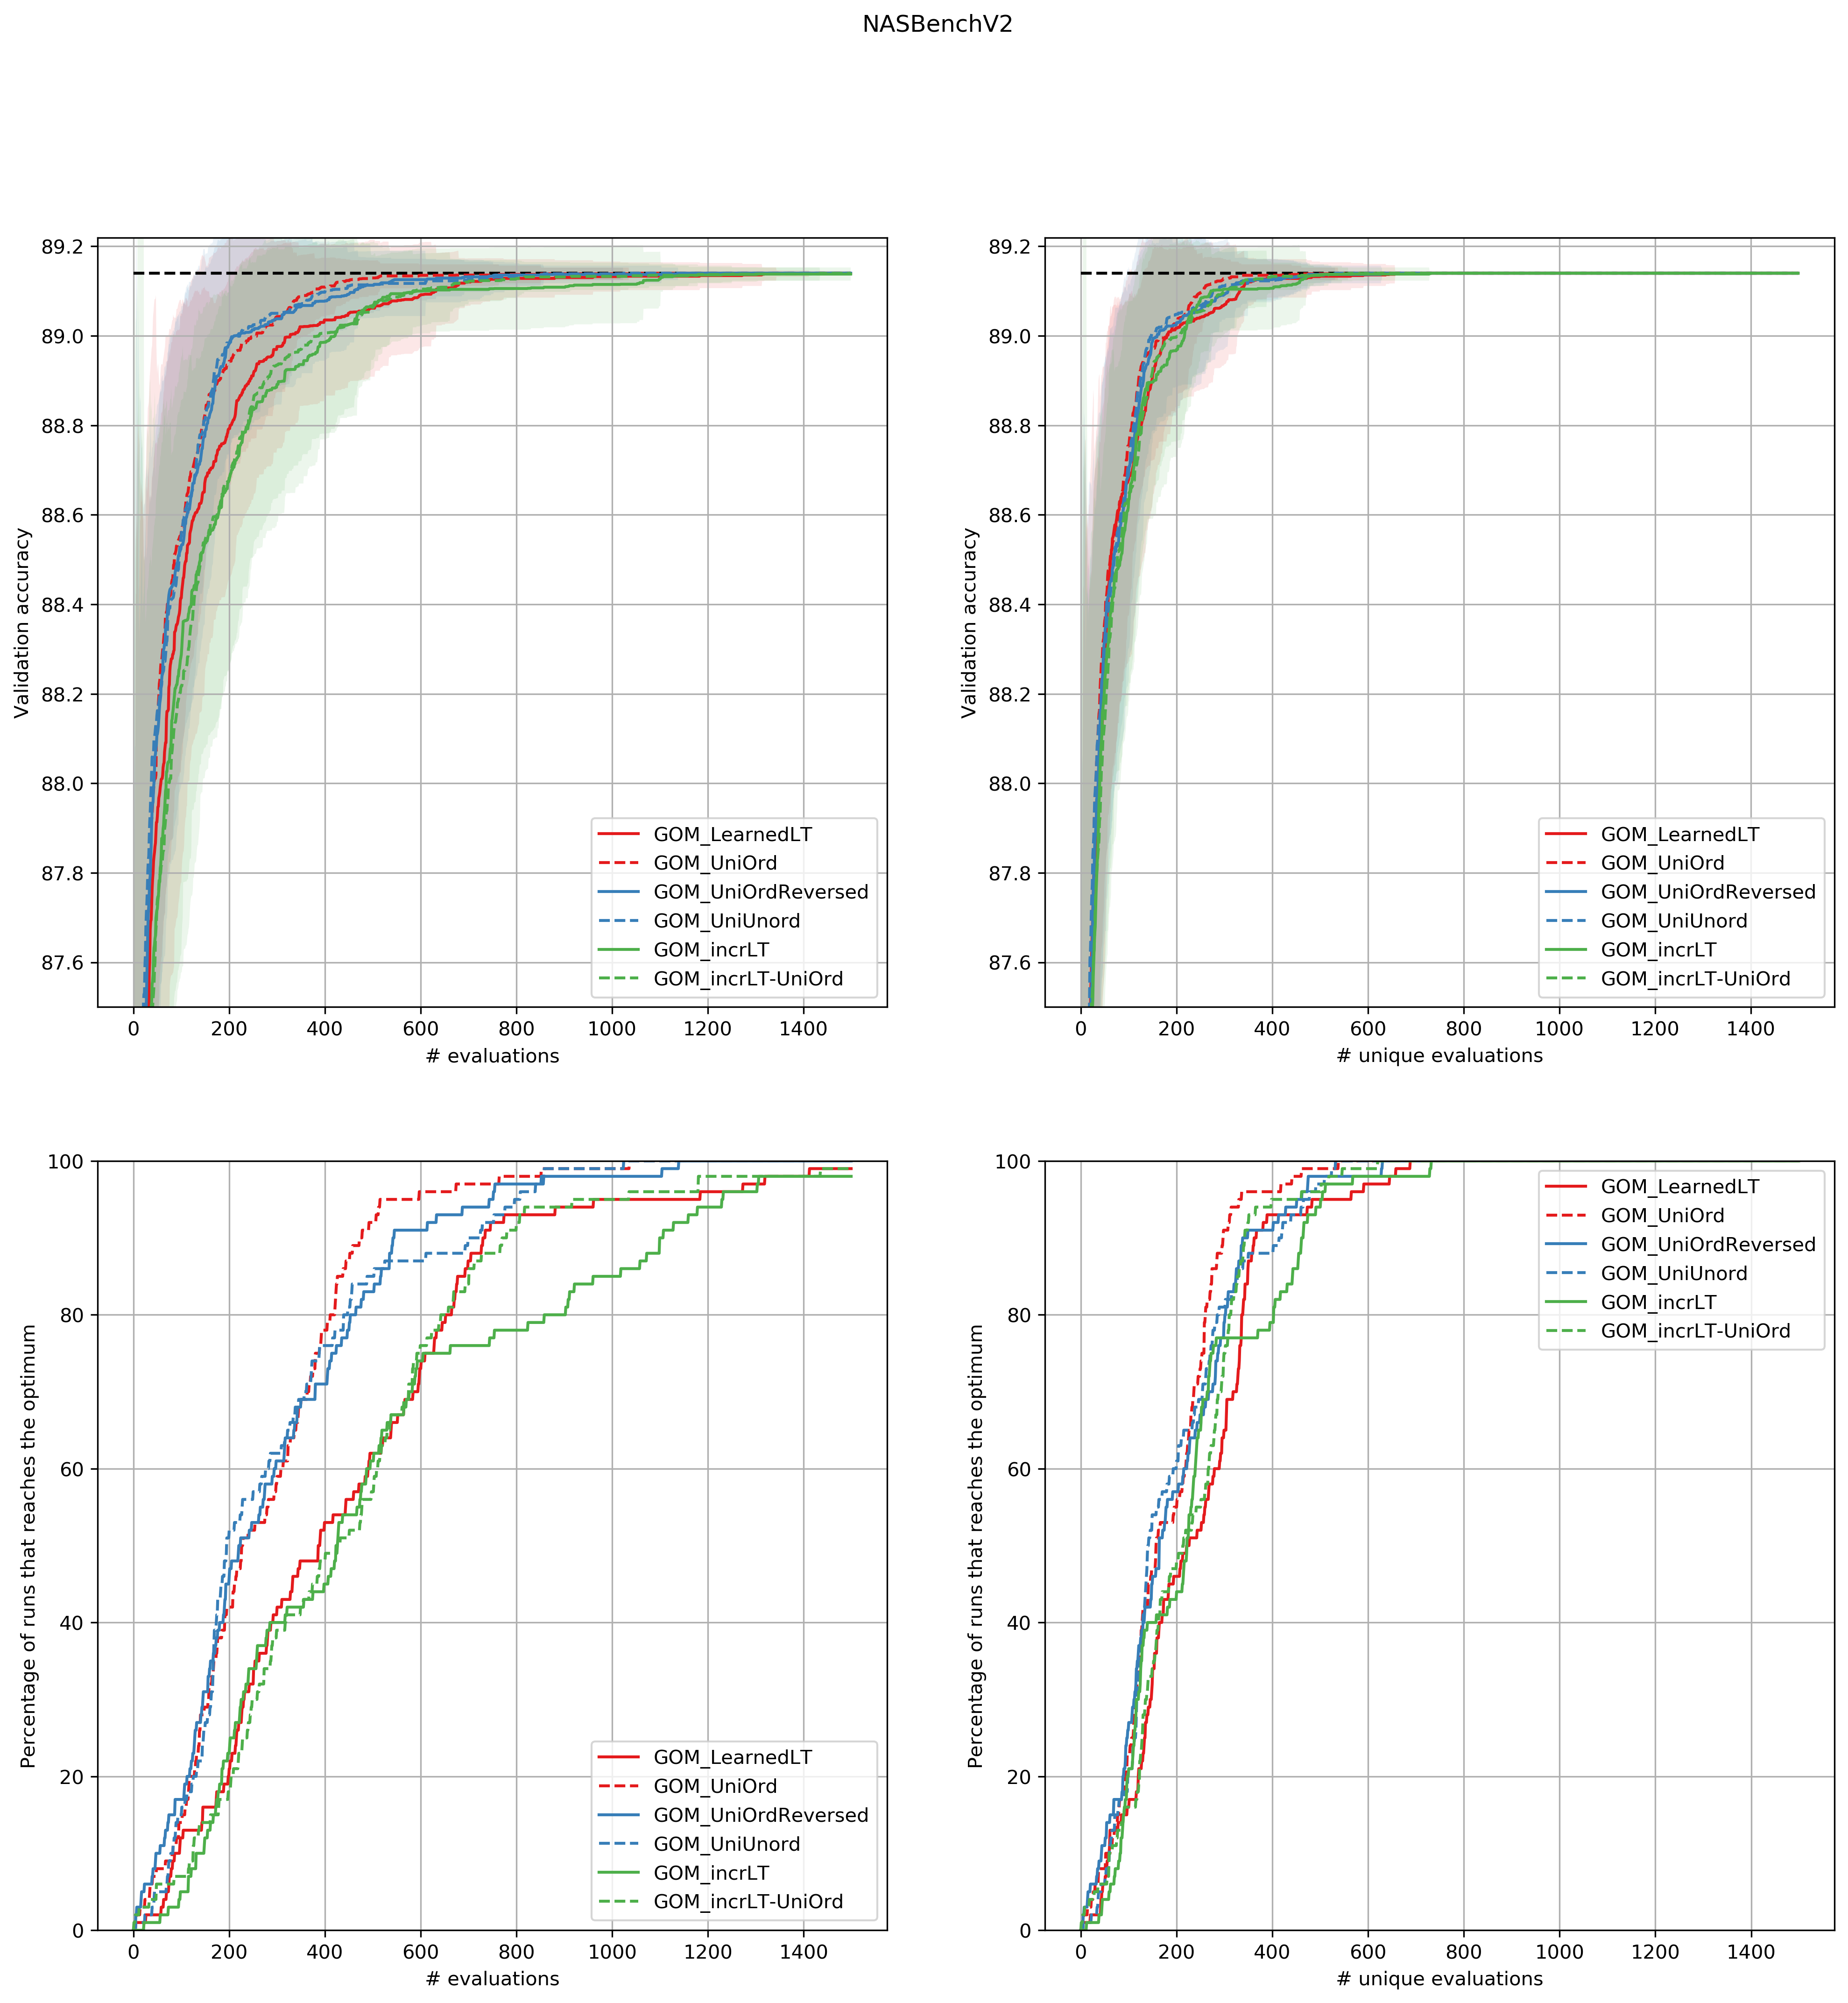

In [114]:
# Until 10000 absolute evaluations. Unique evaluations are also stored.
# Alphabet={0,1,2,3}.
filename = "../data/exp6/data_convergence_012.json"

important = ["GOM_UniOrd", "GOM_UniOrdReversed", "GOM_UniUnord", 
             "GOM_LearnedLT", "GOM_incrLT", "GOM_incrLT-UniOrd"]

for importantOnly in [False, True]:
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
    firstplots = [ax1, ax2]
    secondplots = [ax3, ax4]
    cm = plt.cm.Set1.colors
    cycle = (cycler(color=cm) * cycler(linestyle=['-', '--']))
    for ax in [ax1,ax2,ax3,ax4]:
        ax.set_prop_cycle(cycle)

    numEvaluations = 1500;
    optimum = 89.13

    with open(filename) as json_file:
        rawdata = json.load(json_file)
        repetitions = rawdata["repetitions"]
        print("averages of", repetitions, "repetitions")

        fig.suptitle(rawdata['fitnessFunction'])
        algorithms = rawdata['experiments']
        totalBest = 0;

        for k, evaluationstype in enumerate(["absolute", "unique"]):

            for algo in algorithms:
                if(importantOnly and algo not in important):
                    continue
                data = algorithms[algo]["7"]
                numEntries = len(data)

                accuracies = np.zeros((numEntries, numEvaluations))
                optfound = np.zeros((numEntries, numEvaluations))

                for i, rep in enumerate(data):

                    convergenceValues = data[rep]["convergence"][evaluationstype]
                    fillUntil = min(len(convergenceValues), numEvaluations)

                    accuracies[i, 0:fillUntil] = convergenceValues[0:fillUntil]
                    if(fillUntil < numEvaluations):
                        accuracies[i, fillUntil:numEvaluations] = accuracies[i, fillUntil-1]

                    for j, value in enumerate(accuracies[i,:]):
                        if (value >= optimum):
                            optfound[i][j] = 1

                avgAccuracies = np.mean(accuracies, 0)
                stdAccuracies = np.std(accuracies, 0)

                totalOptfound = np.sum(optfound, 0) / repetitions * 100
                totalBest = max(totalBest, max(avgAccuracies))

                firstplots[k].plot(range(numEvaluations), avgAccuracies, label=algo)
                firstplots[k].fill_between(range(numEvaluations), avgAccuracies-stdAccuracies, avgAccuracies+stdAccuracies, alpha=0.1)

                secondplots[k].plot(range(numEvaluations), totalOptfound, label=algo)

            ax = firstplots[k]
            ax.set_ylim(87.5, optimum * 1.001)
            ax.legend()
            ax.set_xlabel('# evaluations')
            ax.set_ylabel('Validation accuracy')
            ax.hlines(89.14, 0, numEvaluations, linestyles='dashed')
        #     ax.set_xscale('log')
        #     ax.set_yscale('log')
            ax.grid()

            ax = secondplots[k]
            ax.set_ylim(0,100)
            ax.legend()
            ax.set_xlabel('# evaluations')
            ax.set_ylabel('Percentage of runs that reaches the optimum')
            ax.grid()

    ax2.set_xlabel("# unique evaluations")
    ax4.set_xlabel("# unique evaluations")


# Experiment 6.1: All algorithms on NASBenchV2 (Scalability Plots)

averages of 100 repetitions
averages of 100 repetitions


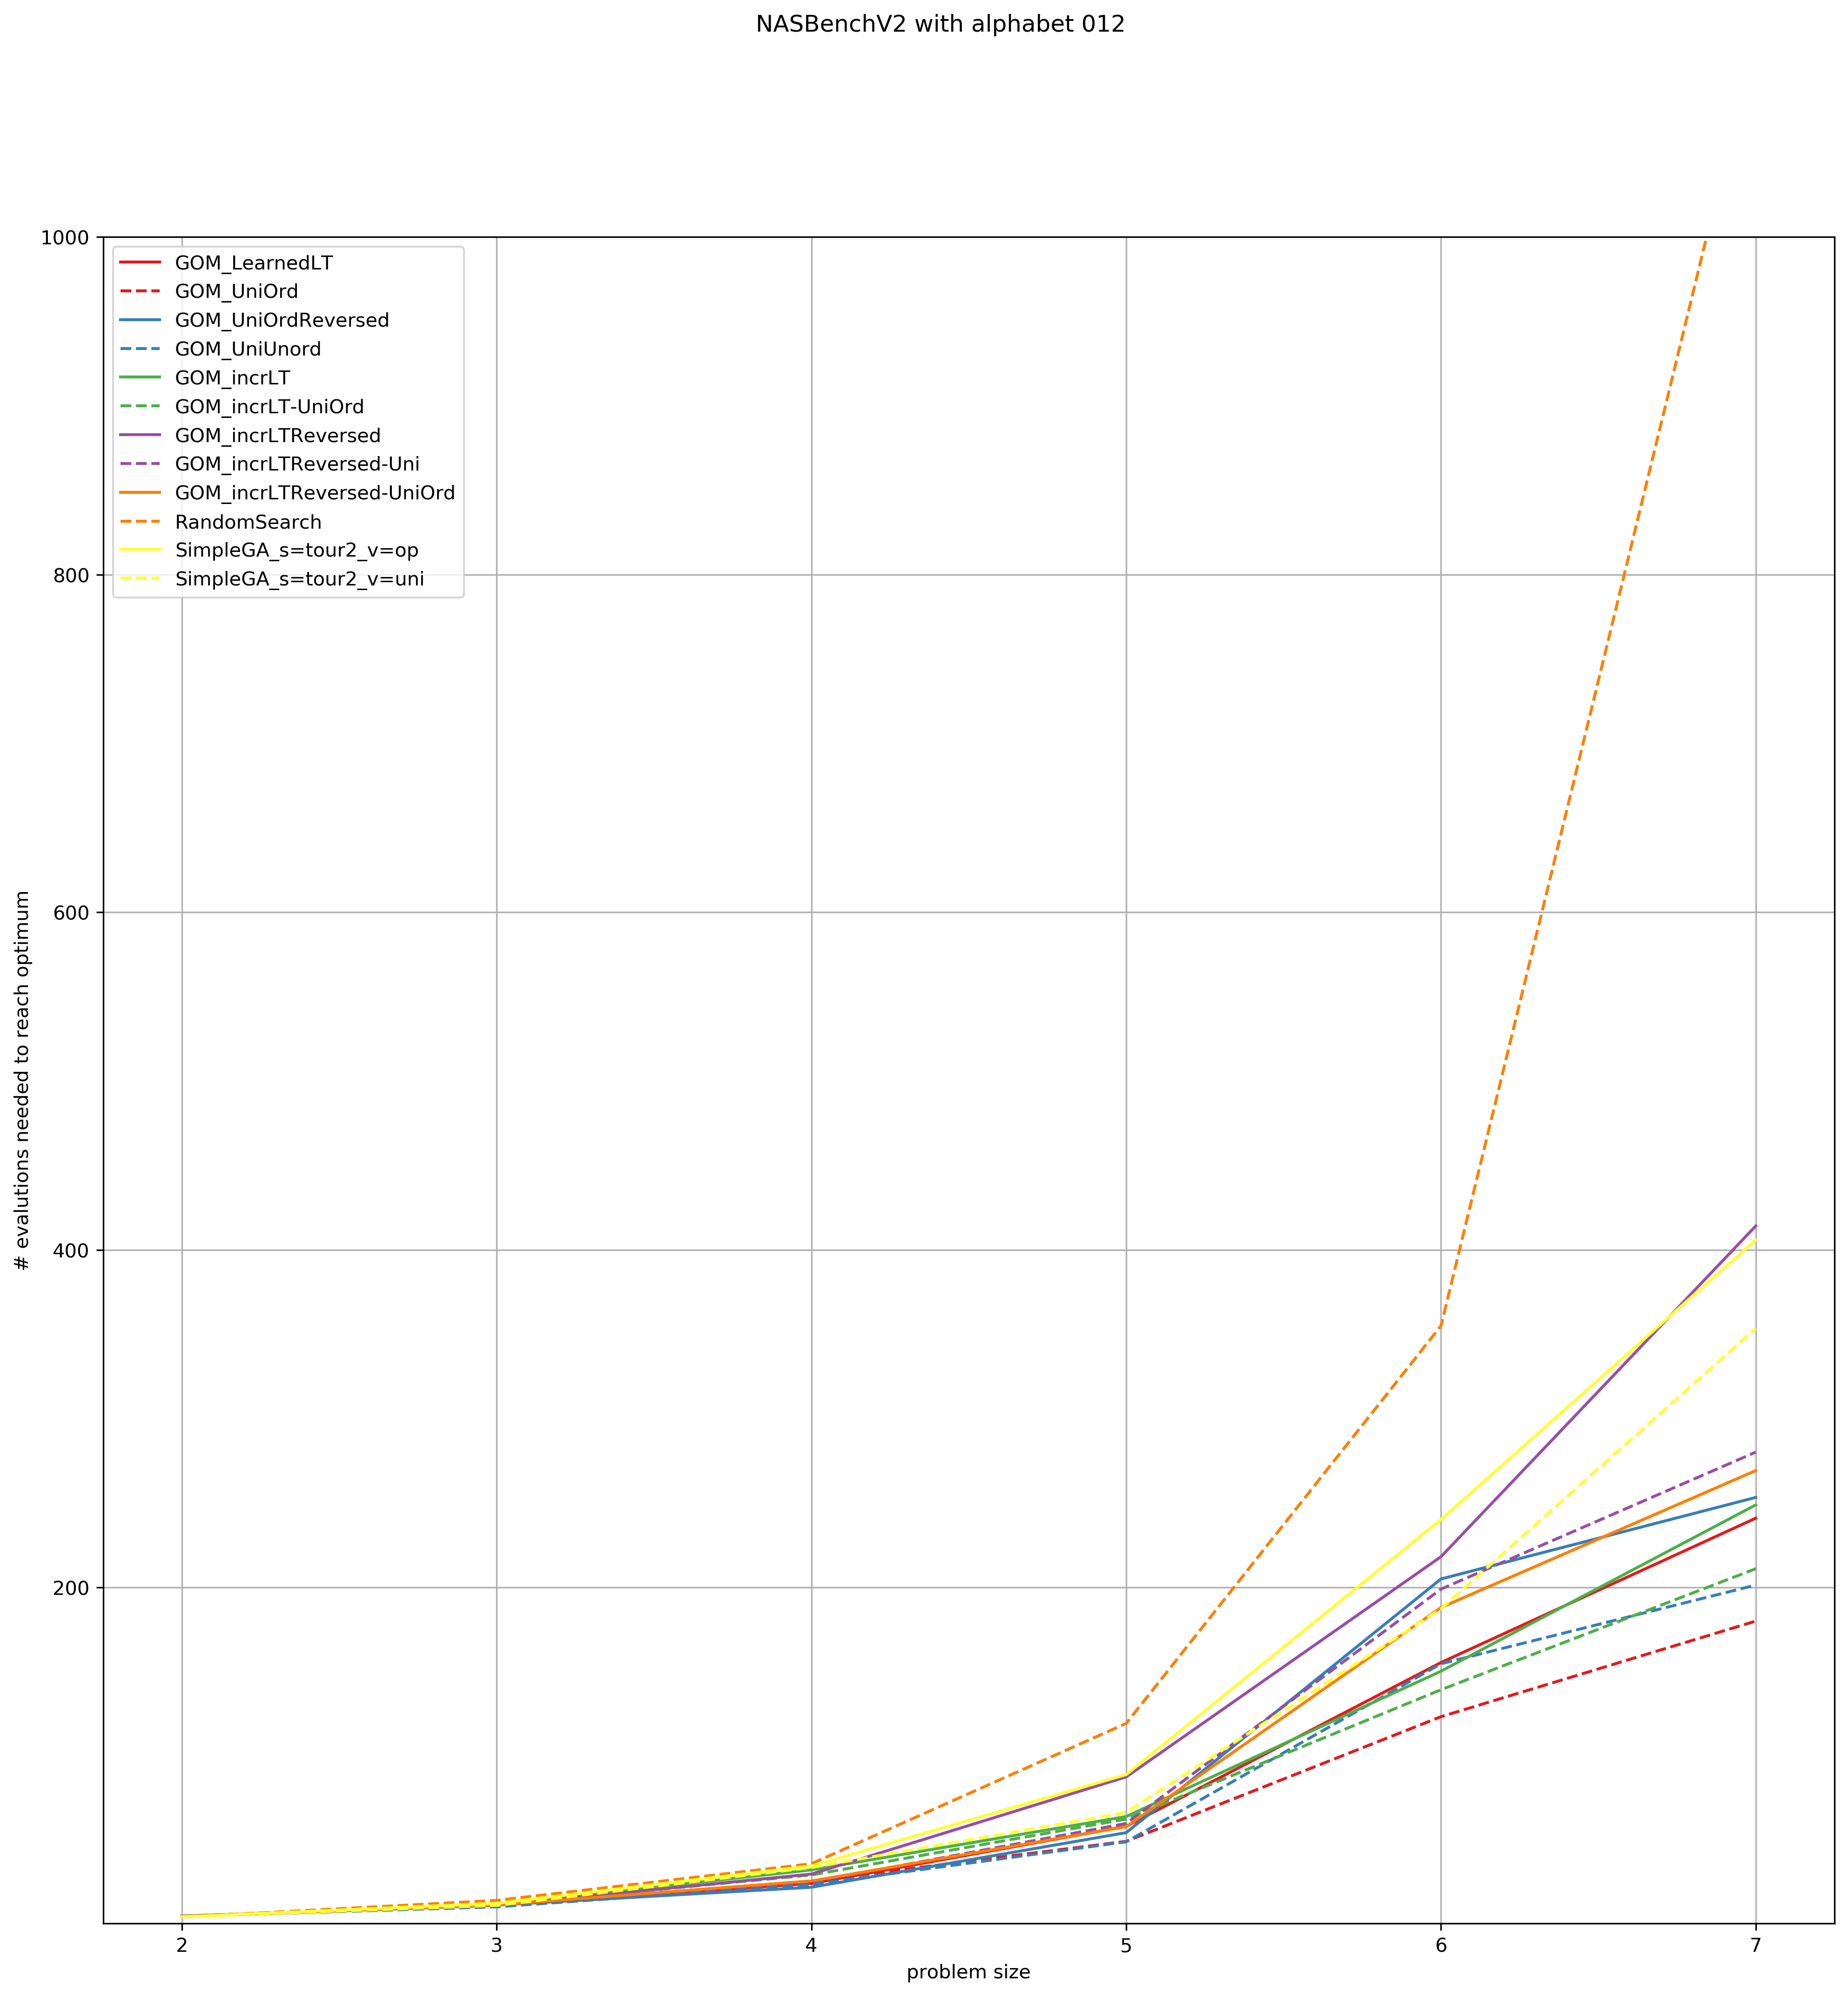

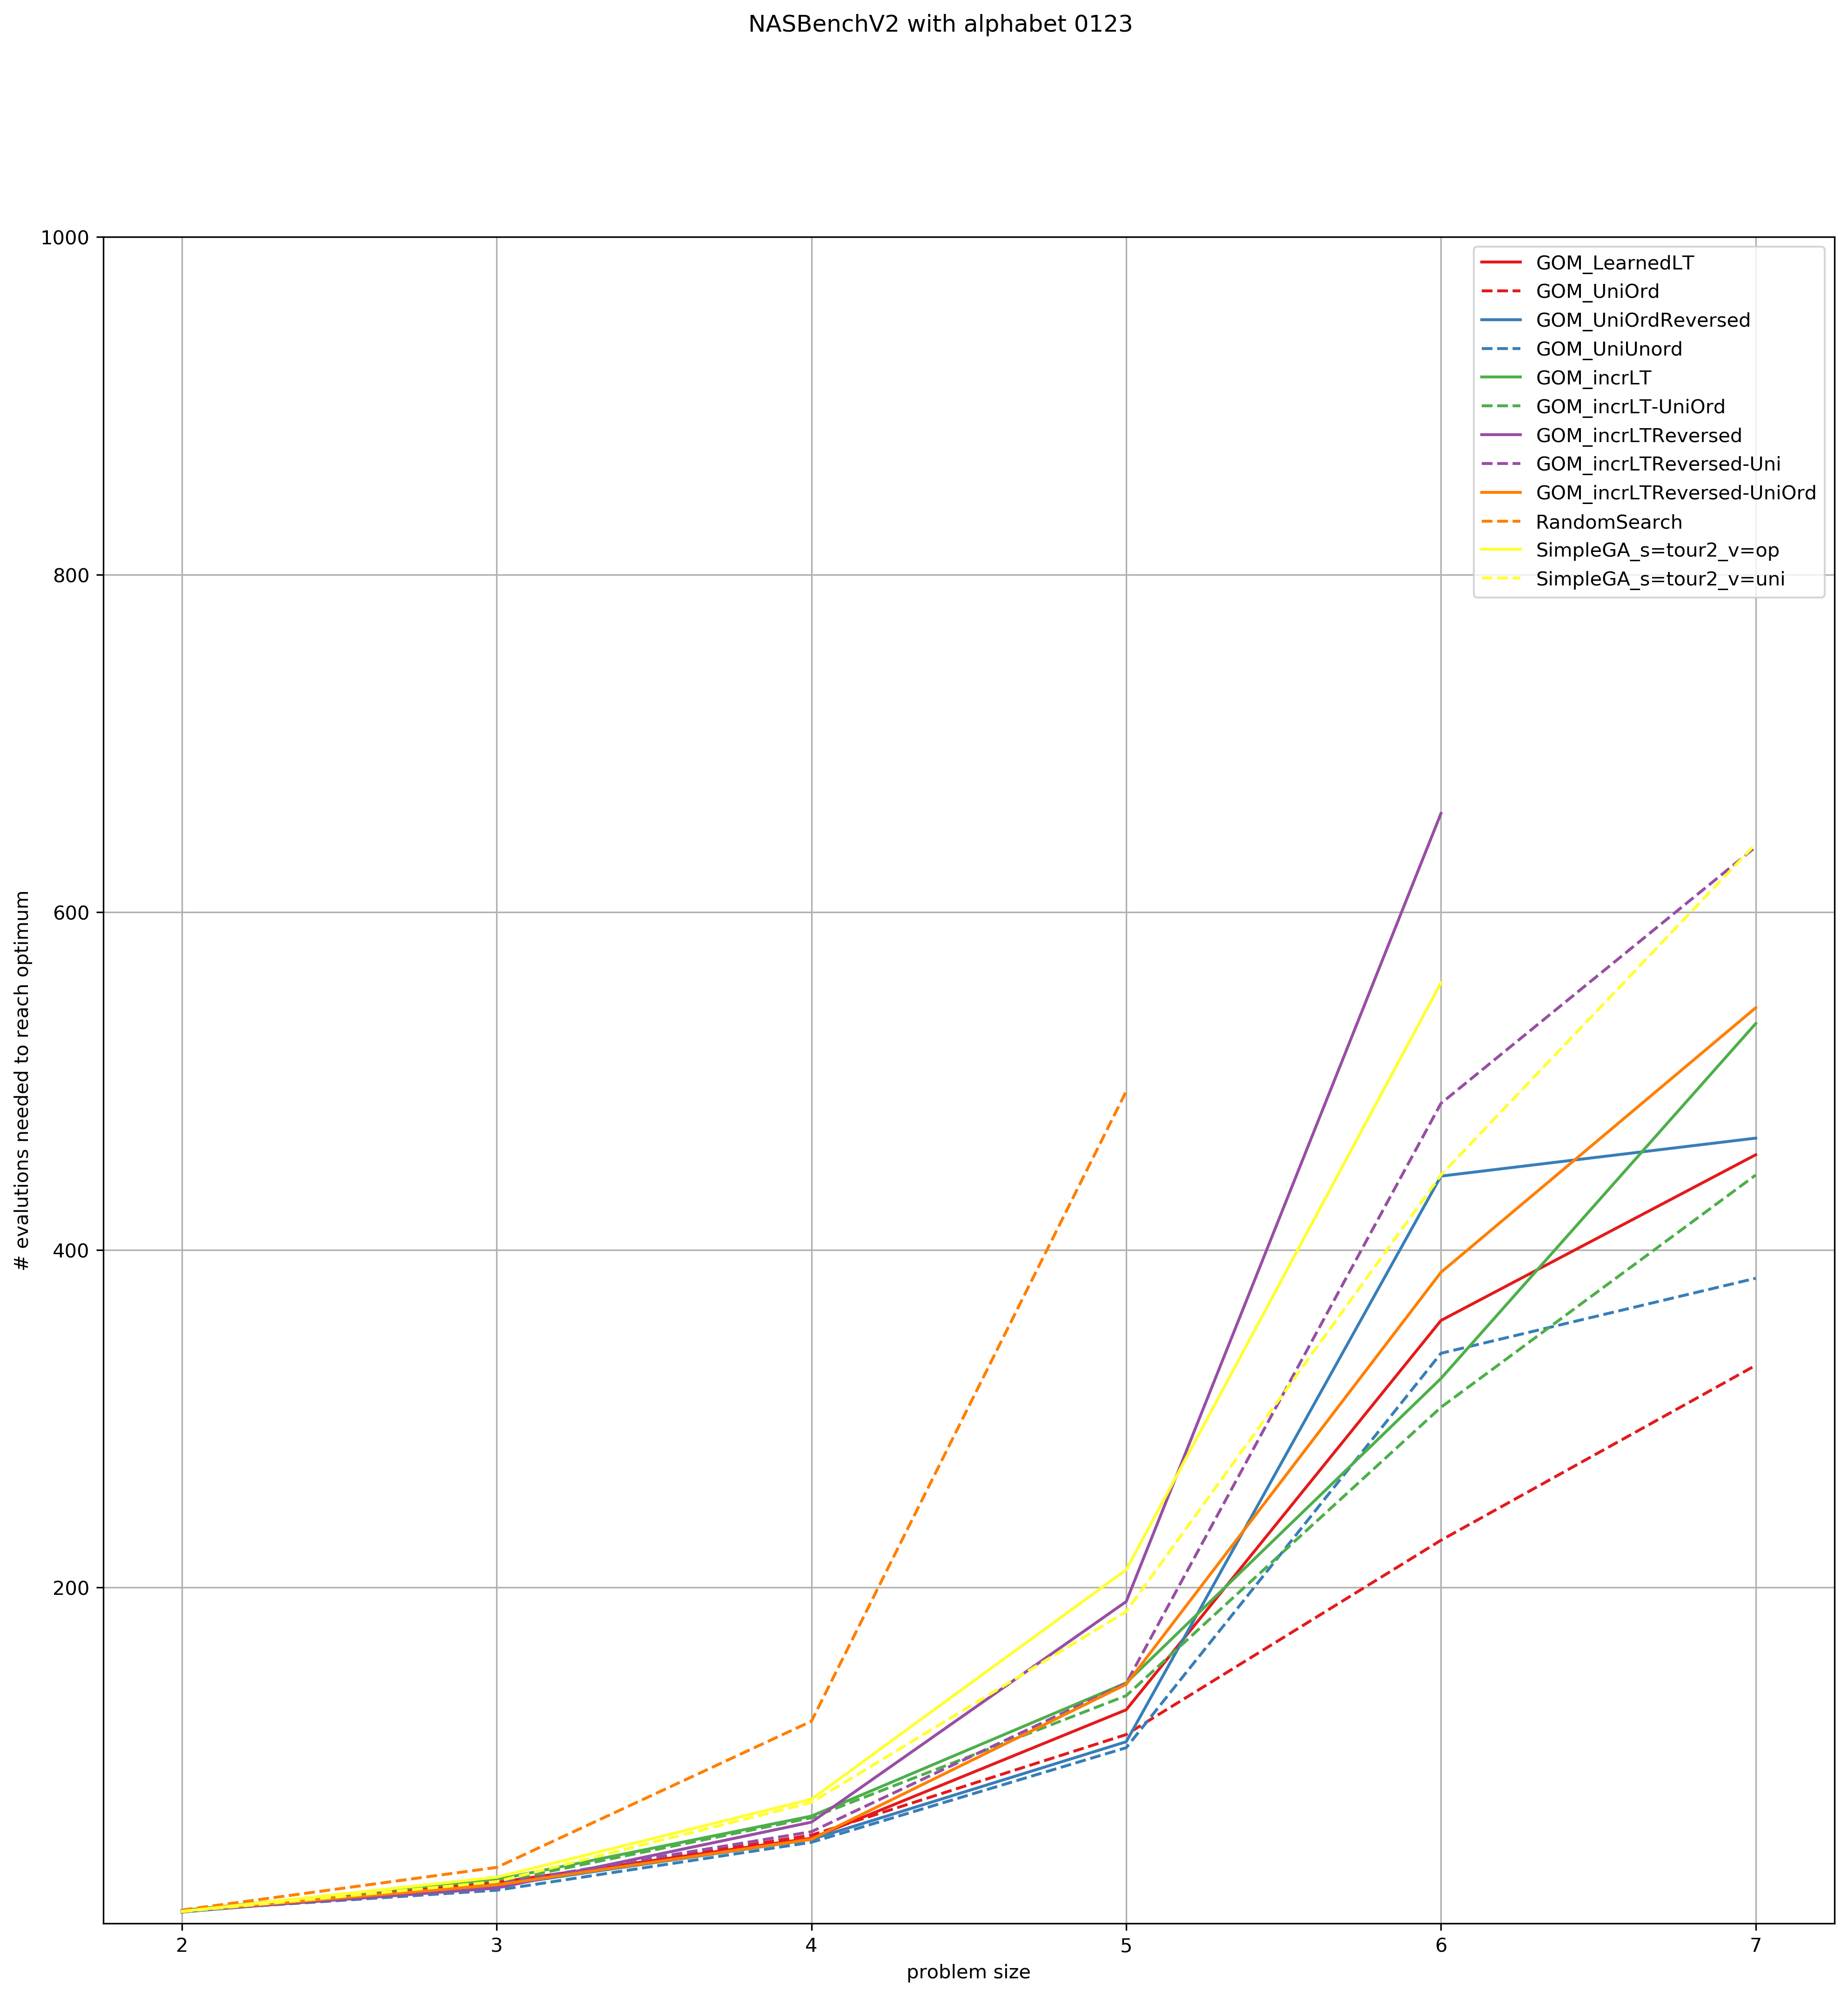

In [119]:
alphabet1 = "012"
alphabet2 = "0123"

for alphabet in [alphabet1, alphabet2]:
    fig, (ax1) = plt.subplots(1, 1)
    cm = plt.cm.Set1.colors
    cycle = (cycler(color=cm) * cycler(linestyle=['-', '--']))
    ax1.set_prop_cycle(cycle)
    ax2.set_prop_cycle(cycle)

    selection = ["GOM_LearnedLT", "GOM_UniOrd", "GOM_UniUnord", "GOM_UniOrdReversed"]

    filename = "../data/exp6/data_scaling_" + alphabet + "/data_combined.json"
    
    with open(filename) as json_file:
        rawdata = json.load(json_file)

        fig.suptitle(rawdata['fitnessFunction'] + " with alphabet " + alphabet)
        algorithms = rawdata['experiments']

        repetitions = rawdata['repetitions']

        numAlgos = len(algorithms)

    #     for algo in selection:
        for algo in algorithms:

            data = algorithms[algo]
            numEntries = len(data)

            Evaluations = np.zeros((numEntries, repetitions))
            Times = np.zeros((numEntries, repetitions))

            for i, problemsize in enumerate(data):

                for j, rep in enumerate(data[problemsize]):

                    Evaluations[i][j] = data[problemsize][rep]["uniqueEvaluations"]
                    Times[i][j] = data[problemsize][rep]["timeTaken"]

            avgEvaluations = np.mean(Evaluations, 1);
            stdEvaluations = np.std(Evaluations, 1);
            avgTimes = np.mean(Times, 1);
            stdTimes = np.std(Times, 1)

            xrange = range(2,numEntries+2)

            ax1.plot(xrange, avgEvaluations, label=algo)
    #         ax1.fill_between(xrange, avgEvaluations-stdEvaluations, avgEvaluations+stdEvaluations, alpha=0.1)
    #         ax1.errorbar(xrange, avgEvaluations, yerr=stdEvaluations)

    #         ax2.plot(xrange, avgTimes, label=algo)
    #         ax2.fill_between(xrange, avgTimes-stdTimes, avgTimes+stdTimes, alpha=0.1)

        ax1.set_ylim(1,1000)
        ax1.legend()
        ax1.set_xlabel('problem size')
        ax1.set_ylabel('# evalutions needed to reach optimum')
        ax1.grid()
#         ax1.set_yscale('log')
        
    
        print("averages of", repetitions, "repetitions")